In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#stats page of HLA alleles
imgt_HLA_stats_url = 'https://www.ebi.ac.uk/ipd/imgt/hla/stats.html'

stats = pd.read_html(imgt_HLA_stats_url, parse_dates=True)

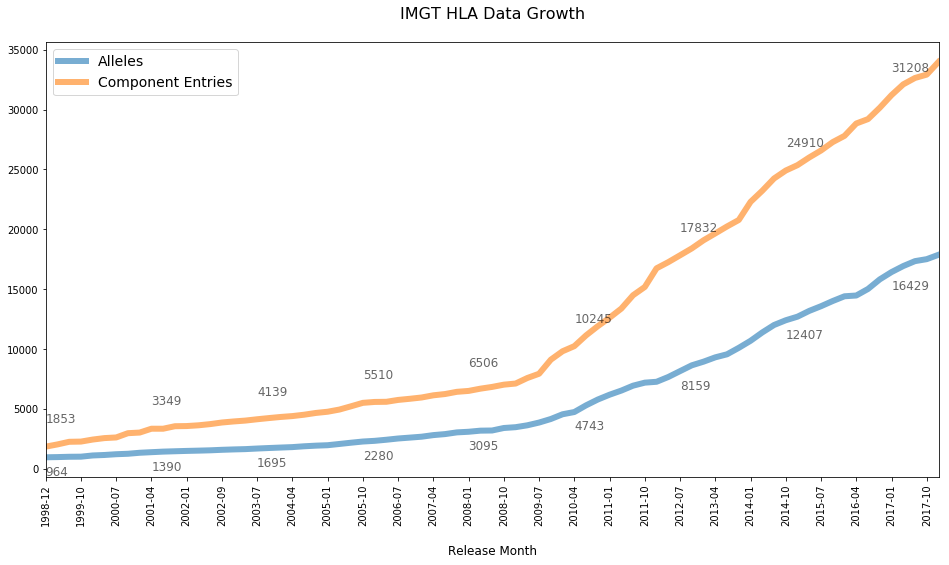

In [3]:
if stats[1].iloc[0,0] == 'Database Growth':
    
    #remove some headings
    d = stats[1].iloc[2:].copy()

    #reset columns
    d.columns = list(stats[1].iloc[1])

    #reset index
    d.set_index('Release', drop=True, inplace=True)

    #convert datatypes
    d.loc[:, ['Alleles','Component Entries']] \
    = d.loc[:, ['Alleles','Component Entries']].astype(int)

    #plot
    d.plot(x=['Month'], 
           y=['Alleles', 'Component Entries'], 
           figsize=(16, 8), 
           alpha=0.6, 
           linewidth=6, 
           rot=90)
    
    ax = plt.gca()
    
    
    #display one tick label every 3 releases (9 calendar months in between)
    #displaying every release makes it too 'busy'
    
    _release_intervals = 3
    
    xticks = [x for x in range(0, len(d['Month']), _release_intervals)]
    xticklabels = d['Month'][::_release_intervals]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_title(label='IMGT HLA Data Growth\n', fontsize=16)
    
    xticks = xticks[::3]
    xticklabels = xticklabels[::3]
    
    plt.xlabel('\nRelease Month', {'fontsize': 12})
    
    plt.legend(prop={'size':14})
    
    for tick, label in zip(xticks, xticklabels):
        ya = d.loc[d[d['Month'] == label].index, 'Alleles']
        plt.text(x=tick, y=ya - 1500, s=ya[0], alpha=0.6, fontsize=12)

        yb = d.loc[d[d['Month'] == label].index, 'Component Entries']
        plt.text(x=tick, y=yb + 2000, s=yb[0], alpha=0.6, fontsize=12)
    
    plt.savefig('plot.png')
else:
    print('The layout of IMGT HLA Stats page has changed, " \
          "the code needs to be updated.')